In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
train_path = "/content/drive/MyDrive/braian-tumor"
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "categorical",
                                              subset="training")
validation_generator = datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "categorical",
                                              subset="validation")



Found 5627 images belonging to 2 classes.
Found 1406 images belonging to 2 classes.


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(units=train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])
h= model.fit(train_generator,epochs=5,validation_data=validation_generator)
loss, acc = model.evaluate(train_generator)
print(f"Training Accuracy: {acc:.4f}")
print(f"Training Loss: {loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1191s 7s/step - accuracy: 0.7590 - loss: 0.5305 - val_accuracy: 0.8137 - val_loss: 0.4868
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.8138 - loss: 0.4781 - val_accuracy: 0.8137 - val_loss: 0.4963
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.8203 - loss: 0.4602 - val_accuracy: 0.8137 - val_loss: 0.4986
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.8156 - loss: 0.4657 - val_accuracy: 0.8137 - val_loss: 0.4962
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.8123 - loss: 0.4663 - val_accuracy: 0.8137 - val_loss: 0.5202
176/176 ━━━━━━━━━━━━━━━━━━━━ 105s 595ms/step - accuracy: 0.8141 - loss: 0.4533
Training Accuracy: 0.8136
Training Loss: 0.4554


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


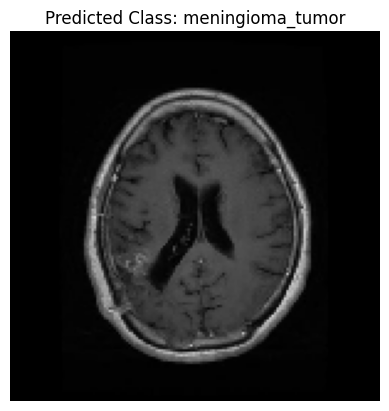

In [ ]:


classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']



img_path = "/content/drive/MyDrive/prediction imgs/giloma img.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
class_labels = list(classes)
predicted_class = class_labels[predicted_class_index]


plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()



In [ ]:
# find a class in a dataset

train_path1= "/content/drive/MyDrive/braian-tumor/Testing"

train_generator12 = datagen.flow_from_directory(train_path1)
train_generator12.class_indices

Found 1311 images belonging to 4 classes.


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
model.save("saved_model/my_model.h5")